<a href="https://colab.research.google.com/github/noora20FH/PCVK/blob/main/leaf_classification_PCVK_finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Noora Aulia Hidayat

TI-3I

2041720046

https://github.com/noora20FH/PCVK/blob/main/leaf_classification_PCVK_finalProject.ipynb

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import closing
from skimage.measure import label, regionprops, regionprops_table
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

#Feature Extraction

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


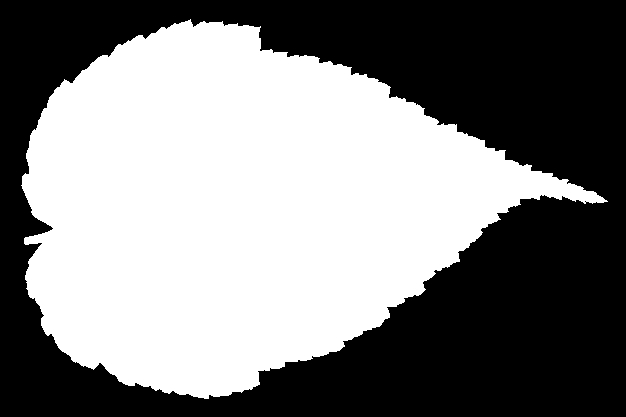

In [ ]:
from google.colab import drive
from PIL import Image
import os

# Mount Google Drive
drive.mount('/content/drive')

# Set the directory path in Google Drive where your images are located
directory_path = '/content/drive/MyDrive/Leaf_Images'

# Get the filenames of the leaves under the directory
image_path_list = os.listdir(directory_path)

# Looking at the first image
i = 0
image_path = os.path.join(directory_path, image_path_list[i])

# Load the image
image = Image.open(image_path).convert('L')  # Convert to grayscale

# Display the image
image.show()


#Machine Learning Implementation

###try other ways

In [ ]:
git clone https://github.com/adl1995/leaf-classification.git
cd leaf-classification
pip install -r requirements.txt
python learn.py

SyntaxError: ignored

#create training & Test dataset

In [ ]:
import os
import random
import shutil

image_directory = '/content/drive/MyDrive/Leaf_Images'
train_ratio = 0.8

train_directory = '/content/drive/MyDrive/Leaf_Images/train_dataset'
test_directory = '/content/drive/MyDrive/Leaf_Images/test_dataset'

if os.path.isdir(train_directory):
    shutil.rmtree(train_directory)
if os.path.isdir(test_directory):
    shutil.rmtree(test_directory)

os.makedirs(train_directory, exist_ok=True)
os.makedirs(test_directory, exist_ok=True)

image_files = os.listdir(image_directory)
random.shuffle(image_files)

split_index = int(len(image_files) * train_ratio)

allowed_extensions = ['.jpg', '.jpeg', '.png']

for i, image_file in enumerate(image_files):
    source_path = os.path.join(image_directory, image_file)
    extension = os.path.splitext(image_file)[1].lower()

    if extension not in allowed_extensions:
        print(f"Skipping file: {source_path}. Unsupported file format.")
        continue

    label = image_file.split('_')[0]  # Assuming label is the part before the underscore in the filename

    if i < split_index:
        destination_dir = os.path.join(train_directory, label)
    else:
        destination_dir = os.path.join(test_directory, label)

    try:
        os.makedirs(destination_dir, exist_ok=True)
    except Exception as e:
        print(f"Error creating directory: {destination_dir}")
        print(str(e))
        continue

    destination_path = os.path.join(destination_dir, image_file)

    try:
        shutil.copyfile(source_path, destination_path)
    except Exception as e:
        print(f"Error copying file: {source_path} to {destination_path}")
        print(str(e))




Skipping file: /content/drive/MyDrive/Leaf_Images/train_dataset. Unsupported file format.
Skipping file: /content/drive/MyDrive/Leaf_Images/test_dataset. Unsupported file format.
Skipping file: /content/drive/MyDrive/Leaf_Images/.ipynb_checkpoints. Unsupported file format.
Skipping file: /content/drive/MyDrive/Leaf_Images/train_dataset_.csv. Unsupported file format.
Skipping file: /content/drive/MyDrive/Leaf_Images/train_dataset.csv. Unsupported file format.
Skipping file: /content/drive/MyDrive/Leaf_Images/test_dataset.csv. Unsupported file format.
Dataset created successfully:
Total images: 36
Training images: 22
Testing images: 8


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# train_directory = '/content/drive/MyDrive/Leaf_Images/train_dataset'
# test_directory = '/content/drive/MyDrive/Leaf_Images/test_dataset'

# train_csv_file = '/content/drive/MyDrive/Leaf_Images/train_dataset/train_dataset.csv'
# test_csv_file = '/content/drive/MyDrive/Leaf_Images/test_dataset/test_dataset.csv'

# header = ['image_name', 'label']

# with open(train_csv_file, 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(header)

#     for filename in os.listdir(train_directory):
#         label = filename.split('_')[0]  # Assuming the label is the part before the underscore in the filename
#         writer.writerow([filename, label])

# with open(test_csv_file, 'w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(header)

#     for filename in os.listdir(test_directory):
#         label = filename.split('_')[0]  # Assuming the label is the part before the underscore in the filename
#         writer.writerow([filename, label])


In [34]:
# Importing some useful/necessary packages
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, log_loss

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import cv2

%matplotlib inline

#DataPreprocessing

#create Train and Test dataset csv


*   split the data into train and test
*   create train_dataset.csv and test_dataset.csv



In [ ]:
import os
import csv
import random
import shutil

image_directory = '/content/drive/MyDrive/Leaf_Images'
train_ratio = 0.8

train_directory = '/content/drive/MyDrive/Leaf_Images/train_dataset'
test_directory = '/content/drive/MyDrive/Leaf_Images/test_dataset'

train_csv_file = '/content/drive/MyDrive/Leaf_Images/train_dataset/train_dataset.csv'
test_csv_file = '/content/drive/MyDrive/Leaf_Images/test_dataset/test_dataset.csv'

header = ['image_name', 'label']

if os.path.isdir(train_directory):
    shutil.rmtree(train_directory)
if os.path.isdir(test_directory):
    shutil.rmtree(test_directory)

os.makedirs(train_directory, exist_ok=True)
os.makedirs(test_directory, exist_ok=True)

label_file = '/content/drive/MyDrive/Leaf_Images/label.csv'

image_files = os.listdir(image_directory)
random.shuffle(image_files)

split_index = int(len(image_files) * train_ratio)

allowed_extensions = ['.jpg', '.jpeg', '.png']

train_data = []
test_data = []

for i, image_file in enumerate(image_files):
    source_path = os.path.join(image_directory, image_file)
    extension = os.path.splitext(image_file)[1].lower()

    if extension not in allowed_extensions:
        print(f"Skipping file: {source_path}. Unsupported file format.")
        continue

    label = input(f"Enter the label for {image_file}: ")
    row = [image_file, label]

    if i < split_index:
        train_data.append(row)
        destination_dir = os.path.join(train_directory, label)
    else:
        test_data.append(row)
        destination_dir = os.path.join(test_directory, label)

    try:
        os.makedirs(destination_dir, exist_ok=True)
    except Exception as e:
        print(f"Error creating directory: {destination_dir}")
        print(str(e))
        continue

    destination_path = os.path.join(destination_dir, image_file)

    try:
        shutil.copyfile(source_path, destination_path)
    except Exception as e:
        print(f"Error copying file: {source_path} to {destination_path}")
        print(str(e))

with open(train_csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(train_data)

with open(test_csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(test_data)

num_images = len(image_files)
num_train = sum(len(files) for _, _, files in os.walk(train_directory))
num_test = sum(len(files) for _, _, files in os.walk(test_directory))
print(f"Dataset created successfully:")
print(f"Total images: {num_images}")
print(f"Training images: {num_train}")
print(f"Testing images: {num_test}")


Enter the label for 1525.jpg: Acer_Capillipes
Enter the label for 425.jpg: Castanea_Sativa
Enter the label for 1273.jpg: Castanea_Sativa
Enter the label for 160.jpg: Acer_Circinatum
Enter the label for 164.jpg: Acer_Circinatum
Enter the label for 235.jpg: Acer_Circinatum
Enter the label for 268.jpg: Acer_Circinatum
Enter the label for 1153.jpg: Castanea_Sativa
Enter the label for 1087.jpg: Castanea_Sativa
Enter the label for 1562.jpg: Acer_Capillipes
Enter the label for 1000.jpg: Acer_Circinatum
Enter the label for 1377.jpg: Acer_Capillipes
Enter the label for 1196.jpg: Acer_Capillipes
Skipping file: /content/drive/MyDrive/Leaf_Images/.ipynb_checkpoints. Unsupported file format.
Enter the label for 569.jpg: Acer_Capillipes
Enter the label for 1506.jpg: Acer_Circinatum
Enter the label for 227.jpg: Acer_Capillipes
Enter the label for 1511.jpg: Castanea_Sativa
Enter the label for 610.jpg: Acer_Capillipes
Enter the label for 990.jpg: Acer_Capillipes
Enter the label for 1019.jpg: Acer_Circi

In [2]:
import pandas as pd

train_csv_file = '/content/drive/MyDrive/Leaf_Images/train_dataset/train_dataset.csv'
test_csv_file = '/content/drive/MyDrive/Leaf_Images/test_dataset/test_dataset.csv'

train_data = pd.read_csv(train_csv_file)
test_data = pd.read_csv(test_csv_file)


In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Preprocess the data to fit for the classifier
le = LabelEncoder().fit(train_data.label) # Instantiate a LabelEncoder and fit to the given label data
labels = le.transform(train_data.label)  # encode species strings and return labels with value between 0 and n_classes-1
classes = list(le.classes_)  # Save the species

In [3]:
#print type(train_raw), type(test_raw)
print ('There are {}'.format(train_data.shape[0]), \
       'samples for building the machine learning model and {}'.format(test_data.shape[0]), \
       'samples for evaluating your model via Kaggle.')

There are 24 samples for building the machine learning model and 6 samples for evaluating your model via Kaggle.


In [4]:
# Let's look at the first 5 rows of train_raw dataset
train_data.head(5)

,image_name,label
0,1525.jpg,Acer_Capillipes
1,425.jpg,Castanea_Sativa
2,1273.jpg,Castanea_Sativa
3,160.jpg,Acer_Circinatum
4,164.jpg,Acer_Circinatum


In [49]:
# Let's look at the first 5 rows of train_raw dataset
test_data.head(5)

,image_name,label
0,769.jpg,Castanea_Sativa
1,1296.jpg,Castanea_Sativa
2,166.jpg,Acer_Circinatum
3,498.jpg,Acer_Capillipes
4,592.jpg,Castanea_Sativa


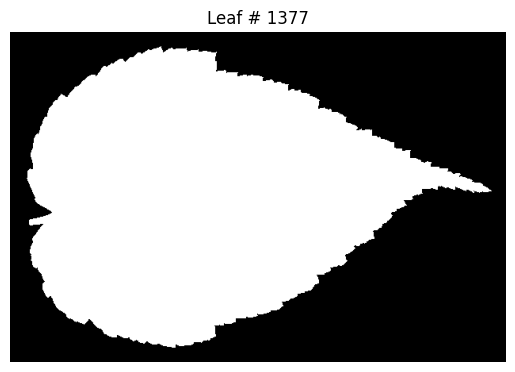

In [16]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Set the directory path in Google Drive where your images are located
directory_path = '/content/drive/MyDrive/Leaf_Images'

# Get the filenames of the leaves under the directory
image_path_list = os.listdir(directory_path)

# Looking at the first image
i = 0
image_path = os.path.join(directory_path, image_path_list[i])

# Load the image
image = Image.open(image_path).convert('L')  # Convert to grayscale

# Extract the image name from the path
image_name = os.path.splitext(image_path_list[i])[0]

# Display the image with the title
plt.imshow(image, cmap='gray')
plt.title('Leaf # ' + image_name)
plt.axis('off')
plt.show()



In [85]:
def species_image(species):
    """
    `species` should be the index or species name

    Returns an image of a certain labeled species
    """

    leaf_image_length = 160
    img_target = 240 * np.ones([leaf_image_length, leaf_image_length*2], np.uint8)  # Initialization
    label_info = ''

    if isinstance(species, int) and species >= 0 and species < 24:
        images_index = np.where(labels == species)[0]
        label_info = str(species) + '-' + train_data.label[images_index[0]]

    else:
        print('Error: Please input a valid index or species name')
        return None, None

    image_names = []  # Store the image names

    for image_index in images_index:
        image_id = train_data.image_name[image_index]
        image_path = os.path.join(directory_path, image_id)
        leaf_img = Image.open(image_path).convert('L')
        leaf_img = np.array(leaf_img.resize((leaf_image_length, leaf_image_length)))
        img_target = np.append(img_target, leaf_img, axis=1)
        image_names.append(image_id)  # Add the image name to the list

    # Add information onto the first block
    label_info_with_names = label_info + ' ' + ', '.join(image_names)  # Combine label_info and image names
    cv2.putText(img_target, label_info_with_names, (10, 90), cv2.FONT_HERSHEY_COMPLEX, 0.8, (100, 170, 0), 2)

    return img_target, label_info_with_names




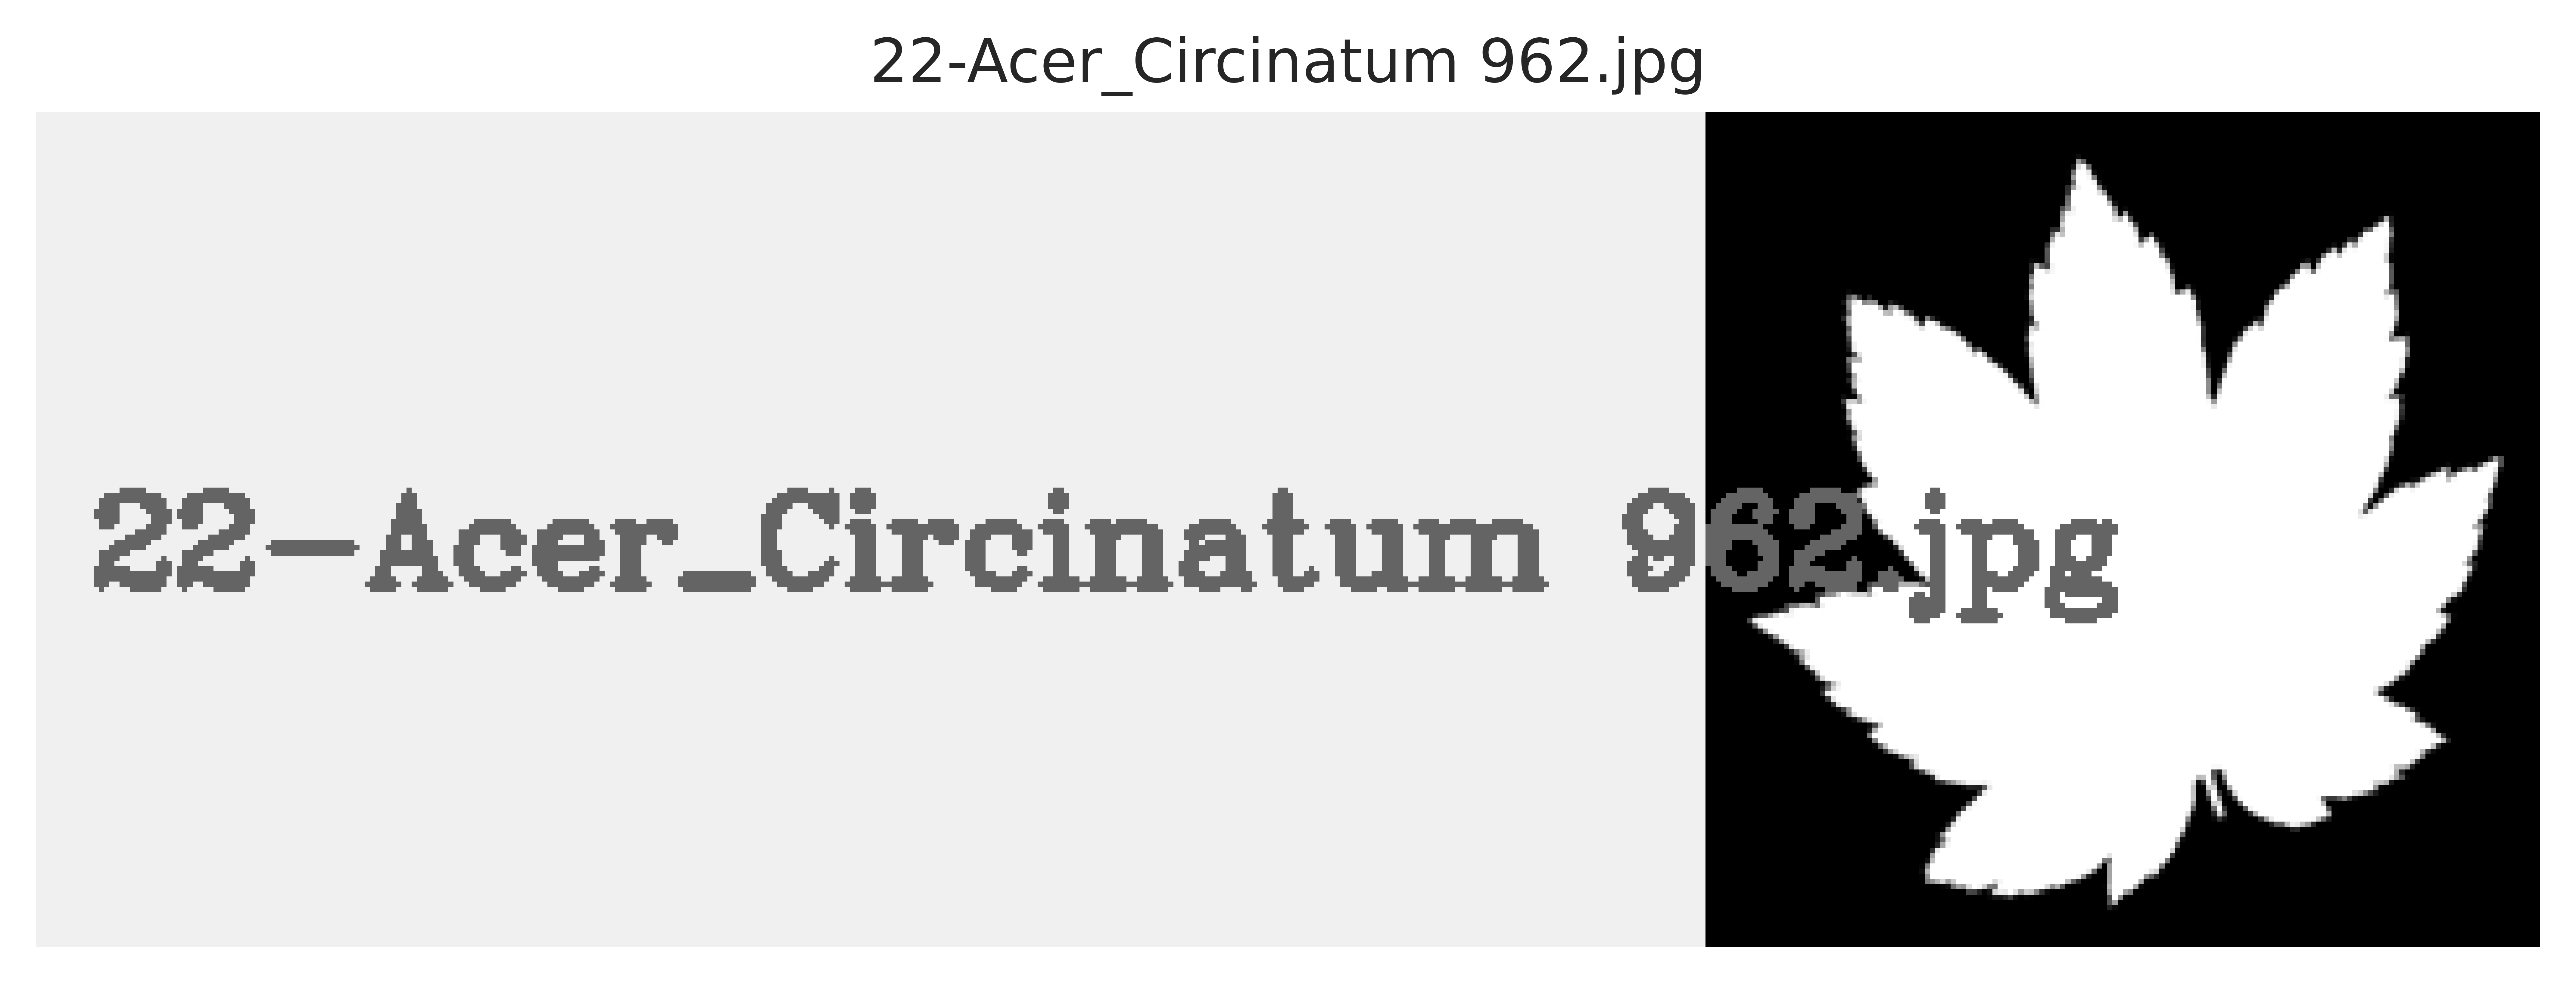

In [86]:
# Test the function
species_img, label_info = species_image(22)  # Show this species of given index (0~98)
if species_img is not None and label_info is not None:
    fig = plt.figure(num=None, figsize=(16, 3), dpi=1200, facecolor='w', edgecolor='w', frameon=False, linewidth=0)
    plt.imshow(species_img, cmap='gray')
    plt.axis('off')
    plt.title(label_info)
    plt.show()

In [79]:
train_data

,image_name,label
0,1525.jpg,Acer_Capillipes
1,425.jpg,Castanea_Sativa
2,1273.jpg,Castanea_Sativa
3,160.jpg,Acer_Circinatum
4,164.jpg,Acer_Circinatum
5,235.jpg,Acer_Circinatum
6,268.jpg,Acer_Circinatum
7,1153.jpg,Castanea_Sativa
8,1087.jpg,Castanea_Sativa
9,1562.jpg,Acer_Capillipes
